In [12]:
import os
import pickle
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils.compute_genre_hits import compute_genre_hits, save_pickle

In [28]:
a = 45; b= 140
mode = "uni"

output_path = f"./tempo_estimation_output/tempo_{a}_{b}"
anchor_type = "anchor_zero"
method = "best_of_n"        # single    multi   best_of_n
# method = "multi"        # single    multi   best_of_n

read_dir = os.path.join(output_path, "eval_data", method)
fname = f"{anchor_type}_{mode}.pkl"
fpath = os.path.join(read_dir, fname)
df_eval = pd.read_pickle(fpath)

print("Choose:\n", df_eval.keys())

Choose:
 dict_keys(['both_hand_y_both_foot_y', 'both_hand_y_both_foot_y_torso_y'])


In [30]:
nam = 'both_hand_y_both_foot_y_torso_y'
df_seg = df_eval[nam]
hits_genrewise = compute_genre_hits(df_seg, mode, anchor_type, method, output_path)

save_pickle(f"./tempo_estimation_output/tempo_45_140/plotting_data/genre_hit_{method}_{nam}.pkl",hits_genrewise)

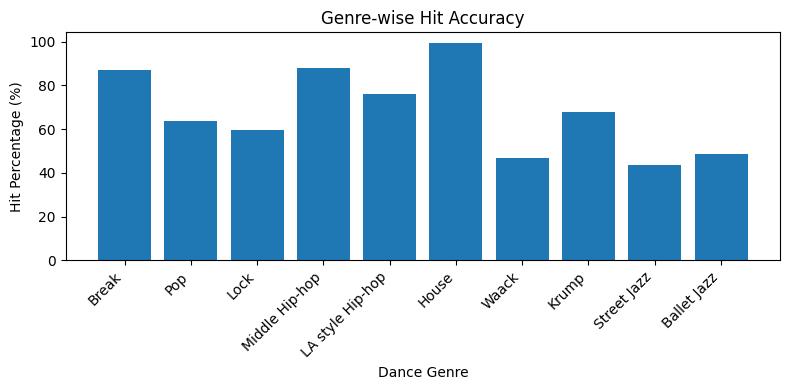

In [5]:
plt.figure(figsize=(8, 4))
plt.bar(hits_genrewise["genre"], hits_genrewise["hit_percentage"])

plt.title("Genre-wise Hit Accuracy")
plt.xlabel("Dance Genre")
plt.ylabel("Hit Percentage (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()